## 1. Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
print( linreg.coef_ )
print (linreg.intercept_ )

[-0.10974146 -0.04424045  0.22700138  0.60989412]
0.19208399482813943


### checking multi-colinearity

In [6]:
R_2 = linreg.score(X,y)
print( 'R-squared : ', R_2.round(3))

VIF = 1/(1-R_2)
print('VIF : ', VIF)

R-squared :  0.93
VIF :  14.372434998799147


### PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

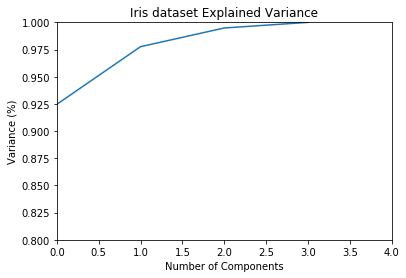

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,4)
plt.ylim(0.8,1)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Iris dataset Explained Variance')
plt.show()

In [11]:
pca2 = PCA(n_components = 2)
pc = pca2.fit_transform(X)
pcdf = pd.DataFrame(pc, columns = ['pc1', 'pc2'])
pcdf.head(5)

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [12]:
df = pd.concat([pcdf, pd.DataFrame(y,columns=['type'])], axis = 1)
df.head()

,pc1,pc2,type
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


In [13]:
pca2.explained_variance_ratio_

array([0.92461621, 0.05301557])

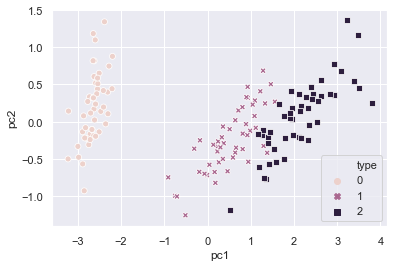

In [16]:
sns.scatterplot('pc1','pc2',hue='type',style='type',data=df)